In [ ]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

In [ ]:
# Cargamos el dataset de Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist
# Cargamos los datos de entrenamiento y test
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Información del dataset
print("Number of training images: ", len(train_labels))
print("Number of test images: ", len(test_labels))
print("Resolution of images: ", train_images.shape[1] , "x", train_images.shape[2])

In [19]:
# Nombres de las clases
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [23]:
# Pasamos las imágenes a blanco y negro para que cada pixel tenga un valor entre 0 y 1
train_images = train_images / 255.0
test_images = test_images / 255.0

## Tipos de Capas
- *Flatten:* Aplana la matriz de entrada en un vector unidimensional
- *Dense:* Capa completamente conectada, es decir, cada neurona de la capa está conectada a cada neurona de la capa anterior y de la siguiente.

## Funciones de activación
- *ReLU:* Si x > 0, devuelve x, de lo contrario devuelve 0
- *Softmax:* Devuelve un vector de probabilidades que suman 1

In [24]:
# Creamos el modelo
model = keras.Sequential()

# Añadimos las capas
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

## Optimizadores
- *Adam:* Optimizador de descenso de gradiente estocástico

## Función de pérdida
- *Categorical Crossentropy:* Función de pérdida para problemas de clasificación multiclase

In [ ]:
# Compilamos el modelo
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenamos el modelo
model.fit(train_images, train_labels, epochs=10)

## Métricas
- *Accuracy:* Calcula la precisión de la clasificación, es decir, el porcentaje de imágenes que se clasificaron correctamente
- *Loss*: Calcula la pérdida de la red neuronal, es decir, la diferencia entre la salida de la red neuronal y la salida deseada

In [ ]:
#Cálculo de la precisión y pérdida del modelo
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('Test accuracy:' ,round(test_acc * 100, 3), '%')
print('Test loss:' ,round(test_loss * 100, 3), '%')

1/1 [==============================] - 0s 53ms/step
Real:  Ankle boot
Prediction:  Ankle boot 

T-shirt/top : 0.0 %
Trouser : 0.0 %
Pullover : 0.0 %
Dress : 0.0 %
Coat : 0.0 %
Sandal : 0.002 %
Shirt : 0.0 %
Sneaker : 0.591 %
Bag : 0.0 %
Ankle boot : 99.406 %


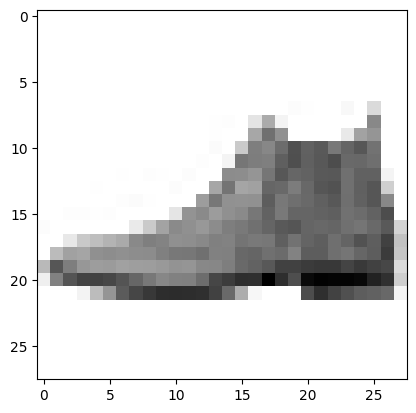

In [75]:
# Función para mostrar una predicción
def make_prediction(number):
    plt.figure()
    plt.imshow(test_images[number], cmap=plt.cm.binary)

    result = model.predict(test_images[number])
    result = result.tolist()[0]

    print ("Real: ", class_names[test_labels[number]])
    print ("Prediction: ", class_names[result.index(max(result))], "\n")

    for i in range(len(result)):
        print(class_names[i], ":", round(result[i] * 100, 3), '%')

    
make_prediction(0)


In [66]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, )

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')